In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load the dataset
df_raw = pd.read_csv("LoanData.csv")

# Define relevant columns
selected_columns = [
    "LoanId",
    "NewCreditCustomer",
    "LoanDate",
    "VerificationType",
    "Age",
    "Gender",
    "Country",
    "AppliedAmount",
    "Amount",
    "Interest",
    "LoanDuration",
    "Education",
    "EmploymentDurationCurrentEmployer",
    "HomeOwnershipType",
    "IncomeTotal",
    "ExistingLiabilities",
    "LiabilitiesTotal",
    "RefinanceLiabilities",
    "Rating",
    "NoOfPreviousLoansBeforeLoan",
    "AmountOfPreviousLoansBeforeLoan",
    "PreviousEarlyRepaymentsCountBeforeLoan"
]

# Select only the relevant columns
df_selected = df_raw[selected_columns].copy()

# Handle missing values
df_cleaned = df_selected.copy()

# Fill categorical columns with mode or specific values
df_cleaned['EmploymentDurationCurrentEmployer'].fillna('Unknown', inplace=True)
df_cleaned['HomeOwnershipType'].fillna('Other', inplace=True)
df_cleaned['Education'].fillna(df_cleaned['Education'].mode()[0], inplace=True)
df_cleaned['VerificationType'].fillna('Unknown', inplace=True)
df_cleaned['Gender'].fillna(df_cleaned['Gender'].mode()[0], inplace=True)

# Fill numerical columns with 0
num_cols_to_fill_zero = [
    'PreviousEarlyRepaymentsCountBeforeLoan',
    'AmountOfPreviousLoansBeforeLoan',
    'NoOfPreviousLoansBeforeLoan'
]
for col in num_cols_to_fill_zero:
    df_cleaned[col].fillna(0, inplace=True)

# Fill Rating with mode (most common value)
df_cleaned['Rating'].fillna(df_cleaned['Rating'].mode()[0], inplace=True)

# Preview cleaned data
print(df_cleaned.head())


C:\Users\iman\AppData\Local\Temp\ipykernel_32204\2253771547.py:7: DtypeWarning: Columns (10,56,73,74,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv("LoanData.csv")


                                 LoanId  NewCreditCustomer    LoanDate  \
0  D8EBF360-104C-420F-BEC9-000924E6EFC7              False  2022-09-09   
1  C1A98DDA-5E20-429C-BBFF-0009A05354E0              False  2023-05-19   
2  9B0B252E-45B9-4172-8E2D-0014A8F18117              False  2024-02-03   
3  66AE108B-532B-4BB3-BAB7-0019A46412C1              False  2016-03-23   
4  C7EA512A-465D-4043-A9F2-001B14C3C14E              False  2023-09-26   

  VerificationType  Age  Gender Country  AppliedAmount  Amount  Interest  ...  \
0              4.0   27     1.0      EE         3189.0  3189.0     35.48  ...   
1              4.0   35     1.0      FI         4146.0  4146.0     19.86  ...   
2              4.0   23     0.0      EE          531.0   531.0     19.52  ...   
3              4.0   53     1.0      EE         2125.0  2125.0     20.97  ...   
4              4.0   43     0.0      FI          414.0   414.0     19.89  ...   

   EmploymentDurationCurrentEmployer  HomeOwnershipType IncomeTotal 

C:\Users\iman\AppData\Local\Temp\ipykernel_32204\2253771547.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['EmploymentDurationCurrentEmployer'].fillna('Unknown', inplace=True)
C:\Users\iman\AppData\Local\Temp\ipykernel_32204\2253771547.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

In [32]:
# Find the sample mean and standard deviation of the "Interest" column
interest_mean = df_cleaned['Interest'].mean()
interest_std = df_cleaned['Interest'].std()

# Find the number of borrowers that received a smaller "Amount" than they applied for
num_less_amount = (df_cleaned['Amount'] < df_cleaned['AppliedAmount']).sum()

# Find the proportion of each loan rating
rating_proportion = df_cleaned['Rating'].value_counts() / len(df_cleaned)


In [ ]:

# print the results
print("Interest rate mean:", round(interest_mean, 2))
print("Interest rate standard deviation:", round(interest_std,2))
print("Number of borrowers that received less money than they asked for:", num_less_amount)
print("Proportion of loan ratings:\n", rating_proportion.sort_index())

Interest rate mean: 26.62
Interest rate standard deviation: 17.73
Number of borrowers that received less money than they asked for: 11667
Proportion of loan ratings:
 Rating
A     0.051101
AA    0.040790
B     0.176926
C     0.313433
D     0.201670
E     0.109784
F     0.070038
HR    0.036258
Name: count, dtype: float64


In [ ]:


### START CODE HERE ###

# Create the column "DebtToIncome"
df_cleaned["DebtToIncome"] = df_cleaned["Amount"] / df_cleaned["IncomeTotal"]

# Create a new column "IsRisky" that is True if the loan is risky
df_cleaned["IsRisky"] = (df_cleaned["DebtToIncome"] >= 0.35) & \
    df_cleaned["EmploymentDurationCurrentEmployer"].isin(["TrialPeriod", "UpTo1Year"])

# Calculate the proportion of risky loans
risky_proportion = df_cleaned["IsRisky"].sum() / len(df_cleaned)

# Calculate the mean interest rate of the risky loans
mean_interest_risky = df_cleaned[df_cleaned["IsRisky"]]["Interest"].mean()

# Calculate the mean interest rate of the non-risky loans
mean_interest_non_risky = df_cleaned[~df_cleaned["IsRisky"]]["Interest"].mean()


### END CODE HERE ###


In [ ]:

# print the results
print("Risky loans proportion:", round(risky_proportion, 4))
print("Mean interest rate of risky loans:", round(mean_interest_risky, 4))
print("Mean interest rate of non-risky loans:", round(mean_interest_non_risky, 4))

Risky loans proportion: 0.1504
Mean interest rate of risky loans: 28.7694
Mean interest rate of non-risky loans: 26.2377


Correlation between Interest Rate and LoanDuration:
-0.0219
Correlation between Interest Rate and IncomeTotal:
-0.0136
Correlation between Interest Rate and AmountOfPreviousLoansBeforeLoan:
-0.1618
Correlation between Interest Rate and DebtToIncome:
nan


c:\Users\iman\python\pythonProject\.venv\Lib\site-packages\numpy\lib\function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


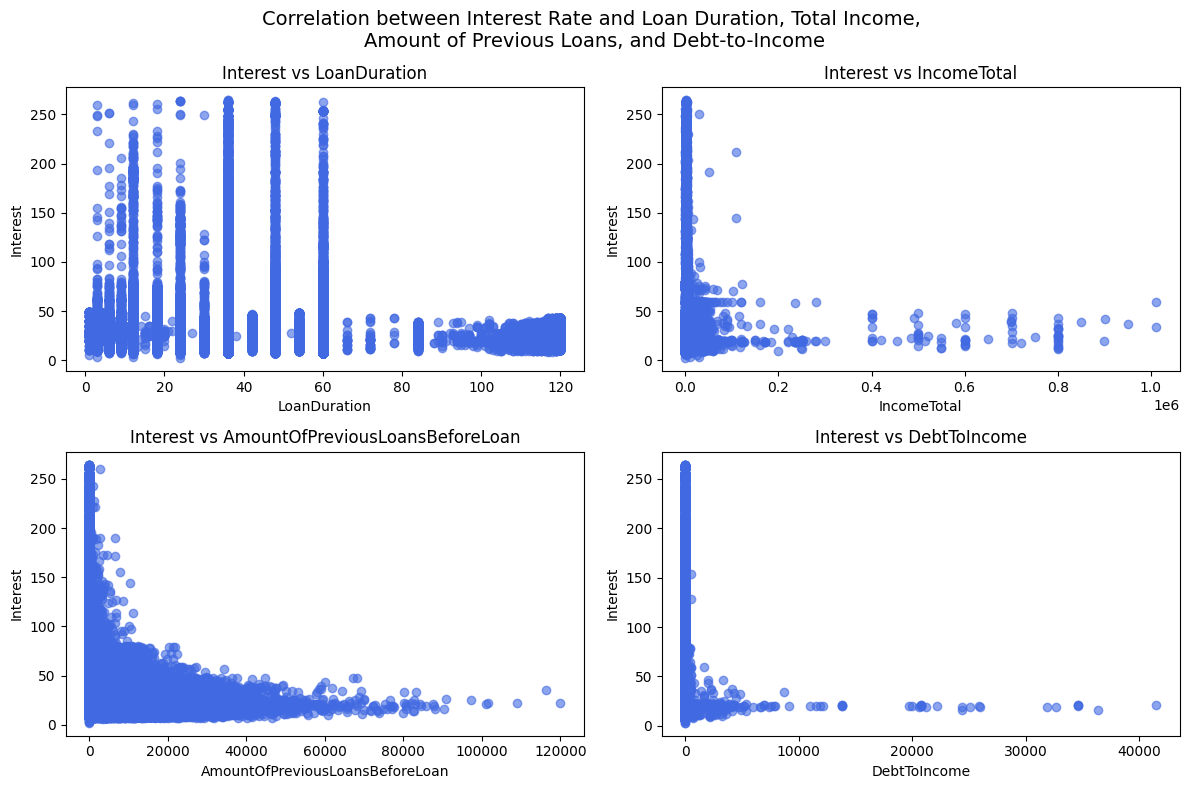

In [ ]:


scatterplot_fig = plt.figure(figsize=(12, 8))

# Create a list to store the correlation values
correlation = []

# List of segmentation columns
corr_columns = ["LoanDuration", "IncomeTotal", "AmountOfPreviousLoansBeforeLoan", 
                "DebtToIncome"]

### START CODE HERE ###

# Iterate over the values 1-4 (one for each subplot)
for i in range(1, 5):
    # Get the column name
    column_name = corr_columns[i - 1]

    # Create subplot
    ax = scatterplot_fig.add_subplot(2, 2, i)

    # Create scatter plot
    ax.scatter(df_cleaned[column_name], df_cleaned["Interest"], alpha=0.6, color='royalblue')

    # Calculate and store the correlation
    corr = df_cleaned[column_name].corr(df_cleaned["Interest"])
    correlation.append(corr)

    # Set subplot title and labels
    ax.set_title(f"Interest vs {column_name}")
    ax.set_xlabel(column_name)
    ax.set_ylabel("Interest")

    # Print the result
    print(f"Correlation between Interest Rate and {column_name}:\n{round(corr, 4)}") 

# General title
scatterplot_fig.suptitle(
    "Correlation between Interest Rate and Loan Duration, Total Income, \nAmount of Previous Loans, and Debt-to-Income",
    fontsize=14
)

### END CODE HERE ###

plt.tight_layout()
plt.show()


In [ ]:


### START CODE HERE ###

# Get the number of samples where "AppliedAmount" differs from the approved "Amount"
num_differences = (df_cleaned["Amount"] < df_cleaned["AppliedAmount"]).sum()

# Get the total number of samples
n = len(df_cleaned)

# Calculate the sample proportion
phat = num_differences / n

# Calculate the standard error for proportions
from math import sqrt
from scipy import stats

se = sqrt(phat * (1 - phat) / n)

# Build the 95% confidence interval
confidence_interval = stats.norm.interval(0.95, loc=phat, scale=se)

### END CODE HERE ###


In [ ]:

# print the results
print("The 95% confidence interval is", confidence_interval)

The 95% confidence interval is (0.027950488958487514, 0.028968508677815363)


In [ ]:


### START CODE HERE ###

# Prepare predictors. Don't forget to add the constant term
X_simple = sm.add_constant(df_cleaned[["AmountOfPreviousLoansBeforeLoan"]])

# Select the dependent variable
Y_simple = df_cleaned["Interest"]

# Build the model
model_simple = sm.OLS(Y_simple, X_simple)

# Fit the model
results_simple = model_simple.fit()

# Print the results summary
print(results_simple.summary())

### END CODE HERE ###


                            OLS Regression Results                            
Dep. Variable:               Interest   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                 1.102e+04
Date:                Sat, 28 Jun 2025   Prob (F-statistic):               0.00
Time:                        13:53:09   Log-Likelihood:            -1.7550e+06
No. Observations:              409951   AIC:                         3.510e+06
Df Residuals:                  409949   BIC:                         3.510e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

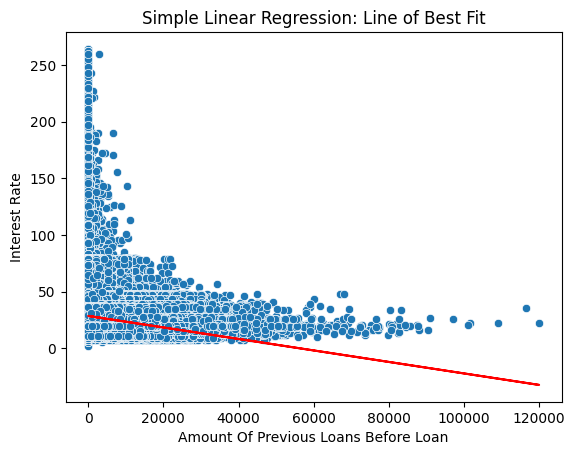

In [29]:
plt.figure()
sns.scatterplot(data=df_cleaned, x="AmountOfPreviousLoansBeforeLoan", y="Interest")

# Plot the regression line
plt.plot(df_cleaned["AmountOfPreviousLoansBeforeLoan"], results_simple.predict(X_simple), color="red")

# Labels and title
plt.title("Simple Linear Regression: Line of Best Fit")
plt.xlabel("Amount Of Previous Loans Before Loan")
plt.ylabel("Interest Rate")

plt.show()


In [ ]:


### START CODE HERE ###

# Define a list with the column names you want to use as predictors
# Include numerical and categorical variables
predictors = [
    "AppliedAmount", "Amount",
    "IncomeTotal",
    "ExistingLiabilities", "RefinanceLiabilities",
    "Age", "NoOfPreviousLoansBeforeLoan", "AmountOfPreviousLoansBeforeLoan",
    "Education", "EmploymentDurationCurrentEmployer",
    "HomeOwnershipType", "Rating"
]

categorical = [
    "Education", "EmploymentDurationCurrentEmployer",
    "HomeOwnershipType", "Rating"
]

# Create the predictors dataframe with dummy variables and constant term
X = sm.add_constant(pd.get_dummies(df_cleaned[predictors], columns=categorical, drop_first=True, dtype=float))

# Create the target variable
Y = df_cleaned["Interest"]

# Create and fit the model
model = sm.OLS(Y, X)
results = model.fit()

### END CODE HERE ###

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:               Interest   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                 1.582e+04
Date:                Sat, 28 Jun 2025   Prob (F-statistic):               0.00
Time:                        13:53:29   Log-Likelihood:            -1.5629e+06
No. Observations:              409951   AIC:                         3.126e+06
Df Residuals:                  409908   BIC:                         3.126e+06
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------